<a href="https://colab.research.google.com/github/Salam-Sarkar/Final-Project-Assignment-20229024-20229032/blob/main/Final_Assignment_by_20229024_%26_20229032.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Final Project Assignment
Prepared by
1. Abdus Salam Sarkar(20229032)
2. Md. mahabubur Rahaman(20229024)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris

1. Obtaining dataset

In [4]:
iris_data = load_iris()

2. Checking attributes of the dataset

In [5]:
print(iris_data.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
print(iris_data.target_names)

['setosa' 'versicolor' 'virginica']


3. Creating pandas data frame from the data set

In [7]:
df = pd.DataFrame(data=np.c_[iris_data['data'], iris_data['target']], columns=iris_data['feature_names'] + ['target'])

4. Checking attributes of the data frame

In [8]:
print(df.shape[0])
print(df['target'].value_counts())

150
0.0    50
1.0    50
2.0    50
Name: target, dtype: int64


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [ ]:
rows=df.sample(n =10)
rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
102,7.1,3.0,5.9,2.1,2.0
40,5.0,3.5,1.3,0.3,0.0
106,4.9,2.5,4.5,1.7,2.0
118,7.7,2.6,6.9,2.3,2.0
107,7.3,2.9,6.3,1.8,2.0
134,6.1,2.6,5.6,1.4,2.0
47,4.6,3.2,1.4,0.2,0.0
140,6.7,3.1,5.6,2.4,2.0
35,5.0,3.2,1.2,0.2,0.0


5. Performing EDA

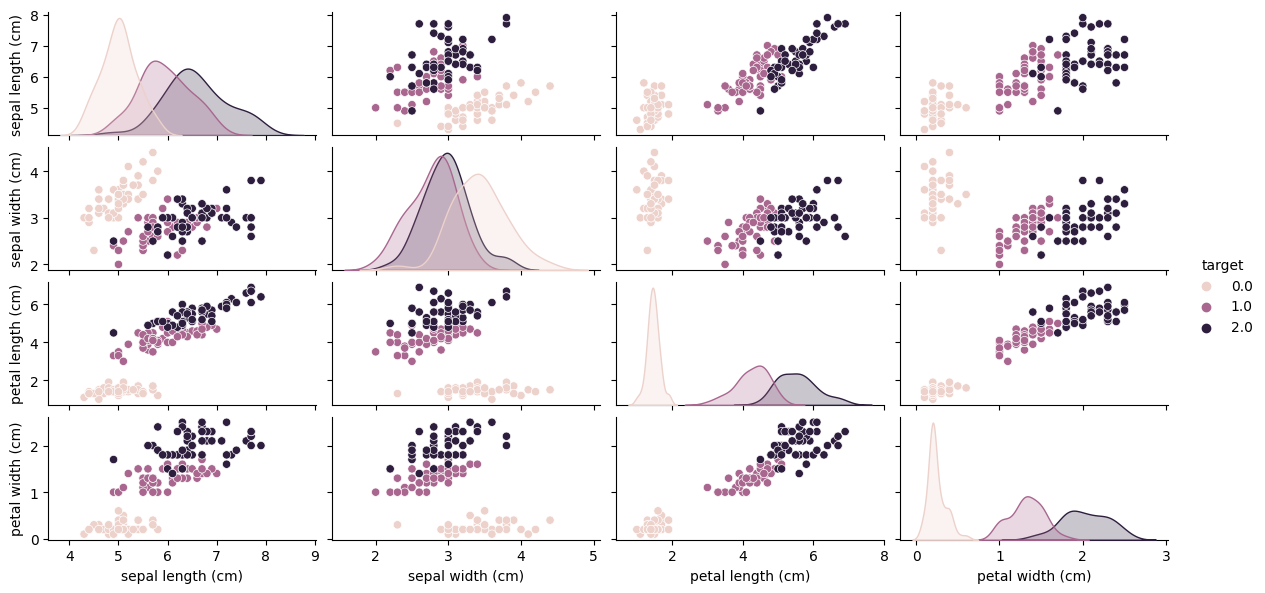

In [15]:
sns.pairplot(df, hue='target', height=1.5, aspect=2)

<Axes: >

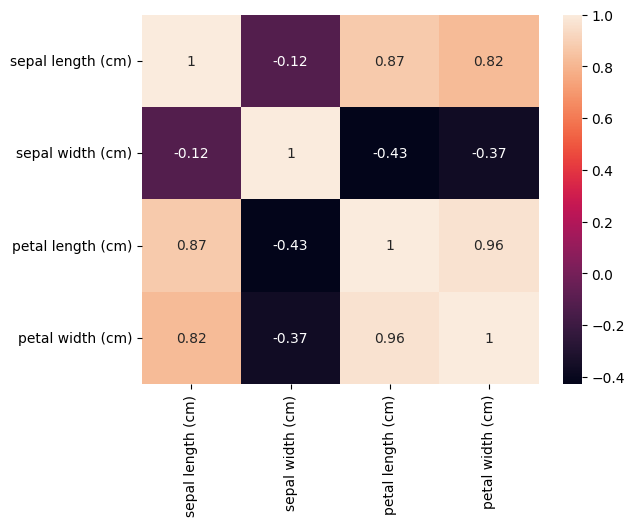

In [19]:
iris_no_target = df.drop('target', axis=1)
correlation = iris_no_target.corr()
sns.heatmap(correlation, annot=True)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

6. Splitting data set into training and testing sets

In [25]:
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.3, random_state=0)

7. Scaling features

In [26]:
sc = StandardScaler()
scaled_data = sc.fit_transform(df.drop('target', axis=1))
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

8. Encoding the target variables

In [27]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

9. Creating logistic regression model and checking prediction accuracy

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [29]:
from sklearn.metrics import accuracy_score
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9777777777777777


10. Creating KNN model and checking accuracy

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [44]:
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9777777777777777


11. Creating decision tree model and checking accuracy

In [45]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [33]:
accuracy = accuracy_score(y_test, y_pred)
y_pred = dt.predict(X_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9777777777777777


12. Creating Random Forest model and checking accuracy

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [47]:
from sklearn.metrics import accuracy_score
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9777777777777777


13. Creating SVM model and checking accuracy

In [48]:
from sklearn.svm import SVC
svm = SVC(random_state=0)
svm.fit(X_train, y_train)

SVC(random_state=0)

In [50]:
from sklearn.metrics import accuracy_score
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9777777777777777


14. Creating Naive Bayes model and checking accuracy

In [51]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [53]:
from sklearn.metrics import accuracy_score
y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


15. As the Navier Bayes model returns highest accuracy so, we will apply this model on entire dataset

In [54]:
X = sc.fit_transform(iris_data.data)
y = iris_data.target

In [55]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X, y)

GaussianNB()

In [68]:
new_observation = np.array([[6.1, 3.4, 4.1, 1.8]])
new_observation_preprocessed = sc.transform(new_observation)
prediction = nb.predict(new_observation_preprocessed)
class_number = prediction[0]
class_name = iris_data.target_names[class_number]
print(f"Predicted class : {class_number} i.e. {class_name}")

Predicted class : 1 i.e. versicolor


In [69]:
new_observation = np.array([[4.5, 5, 5, 2.7]])
new_observation_preprocessed = sc.transform(new_observation)
prediction = nb.predict(new_observation_preprocessed)
class_number = prediction[0]
class_name = iris_data.target_names[class_number]
print(f"Predicted class : {class_number} i.e. {class_name}")

Predicted class : 2 i.e. virginica


In [70]:
new_observation = np.array([[5.0, 3.3, 1.0, 0.2]])
new_observation_preprocessed = sc.transform(new_observation)
prediction = nb.predict(new_observation_preprocessed)
class_number = prediction[0]
class_name = iris_data.target_names[class_number]
print(f"Predicted class : {class_number} i.e. {class_name}")

Predicted class : 0 i.e. setosa
